In [204]:
import torch
from torch import nn # nn contain all of pythorchs building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np  # Import the NumPy library for numerical operations
import torch.optim as optim

# chexk pytorch version
#import torch
#print(torch.__version__)  # Prints the version of PyTorch  


In [205]:
# Create Known Parameters
weight = 0.7
bias = 0.03

# create
start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step). unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0300],
         [0.0440],
         [0.0580],
         [0.0720],
         [0.0860],
         [0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560]]))

In [206]:
len(X), len(y)

(50, 50)

In [207]:
# splitting data into training and test set (one of the most inpotant concepts in machine learning)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

How might we better visualize our data?
this is were the data explorer's motto comes in!
"VISUALIZE, VISUALIZE, VISUALIZE"

In [208]:


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    # Check if predictions exist
    if predictions is not None:
        predictions = predictions.squeeze().detach().numpy()  # Ensure predictions have the correct shape
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")  # Plot predictions in red

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.show()
          
          

 

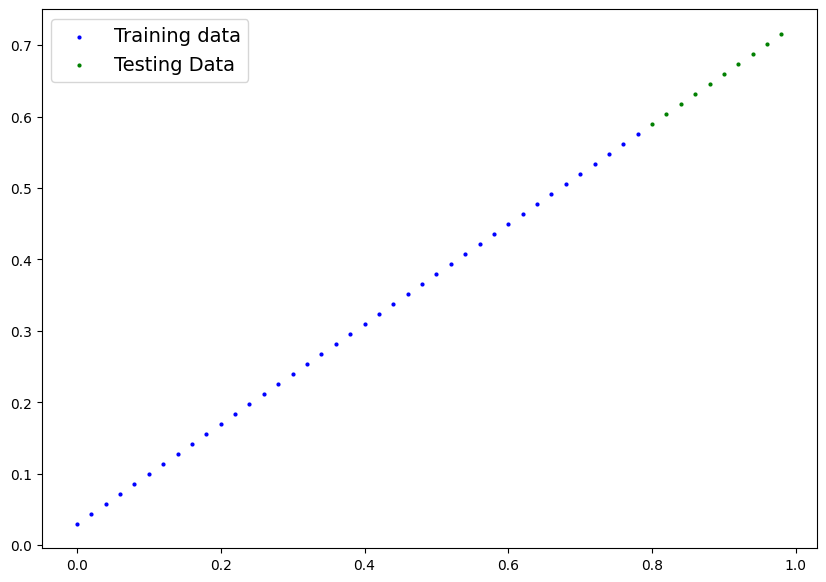

In [209]:
plot_predictions();


2. Build Mode;
Our first Pytorch model
this is very exciting. lets do its!


In [210]:


# Create linear Regression Model 
class LinearRegressionModel(nn.Module):  # <- almost everything in pytorch inherits nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define the computation in the model 
    def forward(self, X: torch.Tensor) -> torch.Tensor:  # <- this line must be indented inside the class
        return self.weights * X + self.bias  # this is the linear regression formula

# Create an instance of the model
model_0 = LinearRegressionModel()

# Print model to ensure it is correctly instantiated
print(model_0)

      
    


LinearRegressionModel()


In [154]:
torch.manual_seed(42)
torch.randn(1)


tensor([0.3367])

In [211]:
#torch.manual_seed(42)

# Create an instance of the LinearRegressionmedel class
model_0 = LinearRegressionModel()
print(model_0)

list (model_0.parameters())


LinearRegressionModel()


[Parameter containing:
 tensor([1.1561], requires_grad=True),
 Parameter containing:
 tensor([0.3965], requires_grad=True)]

In [212]:
# List named oarameters
model_0.state_dict()

OrderedDict([('weights', tensor([1.1561])), ('bias', tensor([0.3965]))])

In [213]:
# making prediction using torch.inference_mode()
# make prediction model

# you can also do something similiar with torch.n_grade() however, torch.inference_mode() is preferred
#with torch.no_grad():
# y_preds = model_0(X_test)
# print(y_preds)

with torch.inference_mode():
  y_preds = model_0(X_test)

# Output predictions
print(y_preds)



tensor([[1.3214],
        [1.3445],
        [1.3676],
        [1.3907],
        [1.4139],
        [1.4370],
        [1.4601],
        [1.4832],
        [1.5064],
        [1.5295]])


In [214]:
y_test

tensor([[0.5900],
        [0.6040],
        [0.6180],
        [0.6320],
        [0.6460],
        [0.6600],
        [0.6740],
        [0.6880],
        [0.7020],
        [0.7160]])

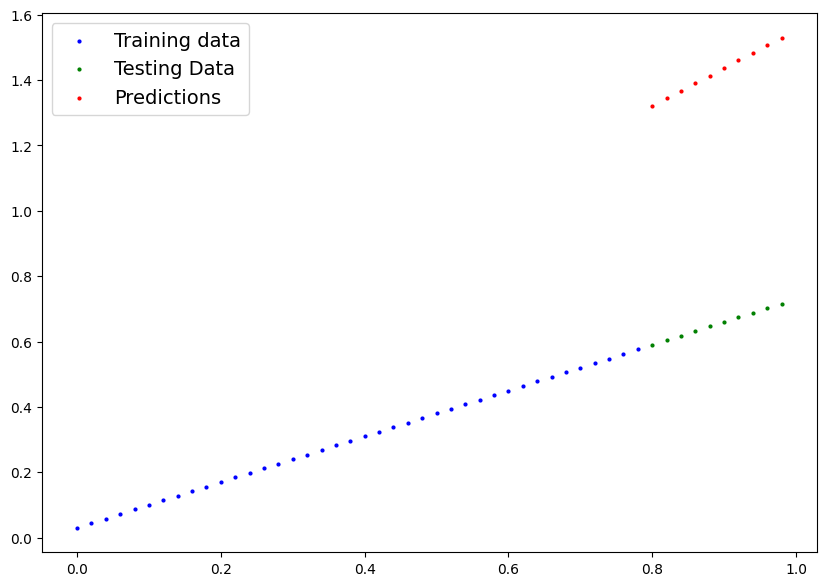

In [216]:
plot_predictions(predictions=y_preds)

In [217]:
y_pred = model_0(X_test)
y_pred

tensor([[1.3214],
        [1.3445],
        [1.3676],
        [1.3907],
        [1.4139],
        [1.4370],
        [1.4601],
        [1.4832],
        [1.5064],
        [1.5295]], grad_fn=<AddBackward0>)

CHECKING THE CONTENT OF PYTROCH MODEL


In [218]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()  # Ensure the class name is correct

# Check out model's parameters (a parameter is a value that the model sets itself)
list(model_0.state_dict())  # This will print the names of the parameters


['weights', 'bias']

In [162]:
# LIST NAMED PARAMATERS
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [163]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradent descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in our medel
                            lr=0.01) # lr = learning reate = possible the most important hyperparameter you can set 

BUILDING A TRAINING LOOP(AND TESTING LOOP) IN PYTORCH

In [164]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define the number of epochs (hyperparameter)
epochs = 200

# Initialize tracking lists for visualization
epoch_count = []
loss_values = []
test_loss_values = []

#### Training Loop
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the training loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Perform optimizer step (gradient descent)
    optimizer.step()

    # Evaluate the model every 10 epochs
    if epoch % 10 == 0:
        # Set the model to evaluation mode
        model_0.eval()

        with torch.inference_mode():
            # Forward pass for test set
            test_pred = model_0(X_test)

            # Calculate test loss
            test_loss = loss_fn(test_pred, y_test)

        # Append current epoch and losses to tracking lists
        epoch_count.append(epoch)
        loss_values.append(loss.item())  # Convert tensor to scalar
        test_loss_values.append(test_loss.item())  # Convert tensor to scalar

        # Print progress
        print(f"Epoch: {epoch} | Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f}")

# Final Model State
print("\nFinal Model Parameters:")
print(model_0.state_dict())



Epoch: 0 | Train loss: 0.0790 | Test loss: 0.2189
Epoch: 10 | Train loss: 0.0679 | Test loss: 0.1781
Epoch: 20 | Train loss: 0.0630 | Test loss: 0.1556
Epoch: 30 | Train loss: 0.0593 | Test loss: 0.1426
Epoch: 40 | Train loss: 0.0558 | Test loss: 0.1315
Epoch: 50 | Train loss: 0.0523 | Test loss: 0.1219
Epoch: 60 | Train loss: 0.0489 | Test loss: 0.1136
Epoch: 70 | Train loss: 0.0454 | Test loss: 0.1054
Epoch: 80 | Train loss: 0.0420 | Test loss: 0.0978
Epoch: 90 | Train loss: 0.0386 | Test loss: 0.0895
Epoch: 100 | Train loss: 0.0351 | Test loss: 0.0812
Epoch: 110 | Train loss: 0.0317 | Test loss: 0.0736
Epoch: 120 | Train loss: 0.0283 | Test loss: 0.0654
Epoch: 130 | Train loss: 0.0248 | Test loss: 0.0571
Epoch: 140 | Train loss: 0.0214 | Test loss: 0.0495
Epoch: 150 | Train loss: 0.0180 | Test loss: 0.0412
Epoch: 160 | Train loss: 0.0145 | Test loss: 0.0330
Epoch: 170 | Train loss: 0.0111 | Test loss: 0.0254
Epoch: 180 | Train loss: 0.0077 | Test loss: 0.0171
Epoch: 190 | Train loss

In [165]:
print(len(epoch_count), len(test_loss_values))

20 20


In [166]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.07898675, 0.06792658, 0.06296793, 0.05927761, 0.0557876 ,
        0.05231064, 0.04888219, 0.04544558, 0.04200868, 0.03858023,
        0.03514195, 0.03170671, 0.02827712, 0.02483831, 0.02140476,
        0.01797349, 0.01453468, 0.01110279, 0.00766986, 0.00423104],
       dtype=float32),
 [0.21887502074241638,
  0.17809264361858368,
  0.1556178778409958,
  0.1425638347864151,
  0.13154374063014984,
  0.12189748138189316,
  0.11362500488758087,
  0.10535252094268799,
  0.09776696562767029,
  0.08949454128742218,
  0.08122209459543228,
  0.07363653182983398,
  0.06536411494016647,
  0.05709168314933777,
  0.049506109207868576,
  0.04123368114233017,
  0.03296126797795296,
  0.025375699624419212,
  0.01710321381688118,
  0.008830791339278221])

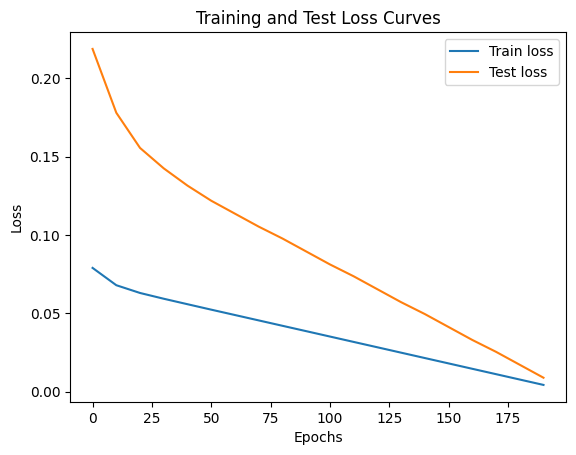

In [167]:

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")  
# Convert `loss_values` (likely a Python list of PyTorch tensors) into a NumPy array
# Plot training loss against the epochs using `epoch_count` as the x-axis.

plt.plot(epoch_count, test_loss_values, label="Test loss")  
# Plot the test loss values against the epochs.
# Ensure `test_loss_values` is a list or array of the same length as `epoch_count`.

plt.title("Training and Test Loss Curves")  
# Set the title of the plot to describe what the graph represents.

plt.ylabel("Loss")  
# Label the y-axis to indicate the values represent loss (e.g., error in prediction).

plt.xlabel("Epochs")  
# Label the x-axis to indicate the values represent epochs (iterations of training).

plt.legend()
# Add a legend to distinguish between the training and test loss curves.

plt.show() 
# Display the plot to visualize the loss curves.

In [168]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [169]:
weight, bias

(0.7, 0.03)

In [170]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6914])), ('bias', tensor([0.0258]))])

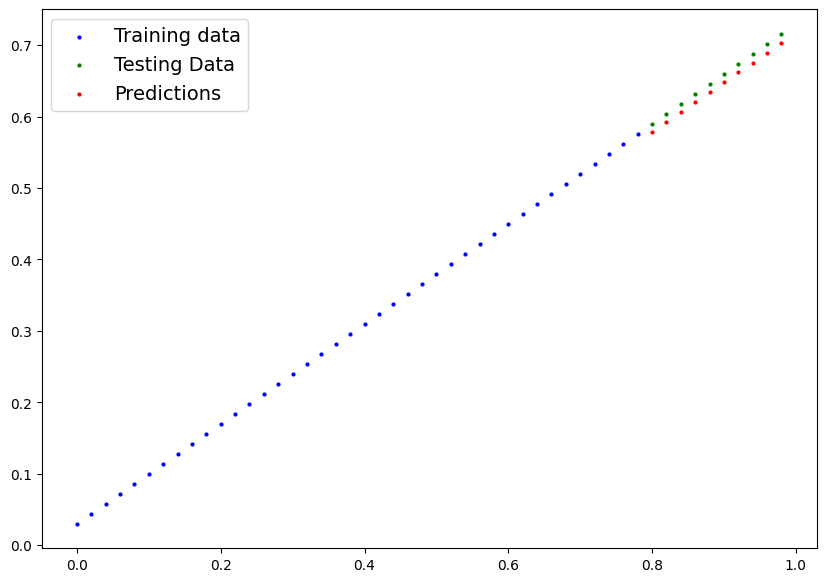

In [171]:
plot_predictions(predictions=y_preds_new)

** Saving a model in pytorch
*there are three main method you should know about for saving and load models i pytorch
1. torch.save()' - allows you to save a pytorch object in pytorch- python pickle formate
2. troch.load()' - allows you to load a save pytorch object
3. troch.nn.module.load_state_dict()' - this allows to load  a model's save dictionary


In [172]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6914])), ('bias', tensor([0.0258]))])

In [173]:
# Save our PyTorch model
from pathlib import Path

# 1. Create the models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.path"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

# Check if the file exists
if MODEL_SAVE_PATH.exists():
    print(f"File successfully saved at: {MODEL_SAVE_PATH}")
else:
    print(f"File not found at: {MODEL_SAVE_PATH}")


Saving model to: models\01_pytorch_workflow_model_0.path
File successfully saved at: models\01_pytorch_workflow_model_0.path


In [174]:
import os
print(os.getcwd())


c:\Users\saioa\Documents\Work  folder


**Loading A pytorch model* 
Since we save our models state_dict() rather the entire model, well create a new instance of our model class and load the save 
state_dict() into it.

In [175]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6914])), ('bias', tensor([0.0258]))])

In [176]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the save state_dict of the model_0 (this will update the new instance with update)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


C:\Users\saioa\AppData\Local\Temp\ipykernel_668\3542236974.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [177]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6914])), ('bias', tensor([0.0258]))])

In [178]:
# making some predictions with our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.5789],
        [0.5927],
        [0.6065],
        [0.6204],
        [0.6342],
        [0.6480],
        [0.6619],
        [0.6757],
        [0.6895],
        [0.7033]])

In [179]:
#1. make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.5789],
        [0.5927],
        [0.6065],
        [0.6204],
        [0.6342],
        [0.6480],
        [0.6619],
        [0.6757],
        [0.6895],
        [0.7033]])

In [180]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

6. PUTTING IT ALL TOGETHER
LET'S GO BACK  THROUGH THE STEP ABOVE AND SEE IT ALL IN PLACE

In [181]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
print(torch.__version__)

2.4.1


CREATE DIVICE-AGNOSTIC CODE
this means if we've got access to a GPU, our code will use it(for potentially faster computing).
if no GPU is available, the code will default to using CPU 

In [182]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


6.1 DATA

In [183]:
# create some data using the linear regression formula of Y = weight * X + bias
weight = 0.7
bias = 0.3
# Create renge values 
start = 0
end = 1
step = 0.02

# create X and Y (features and labels)
X = torch.arange(start,  end, step).unsqueeze(dim=1) # without unsqueeze, erors will pop
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [184]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train  = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

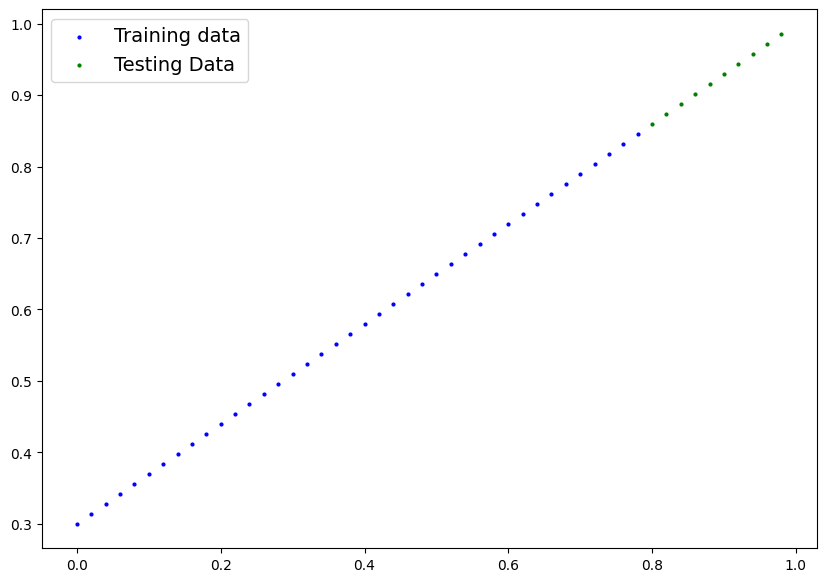

In [185]:
# plot the data
# Note if you dont have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

* 6.2 BUILDING A PYTORCH LINEAR MODEL

In [186]:
import torch
import torch.nn as nn

# Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Create a linear layer with 1 input feature and 1 output feature
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # Define the forward pass
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

# Set the manual seed for reproducibility
torch.manual_seed(42)

# Initialize the model
model_1 = LinearRegressionModelV2()

# Print the model and its parameters
print(model_1)  # To see the architecture
print(model_1.state_dict())  # To see the initialized weights and biases

    

    

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [187]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [188]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [189]:
# set the model to use the target device
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Now move the model to the specified device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [190]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

6.3 TRAINING
Fro training we used:
* LOSS FUNCTION
* OPTIMIZER
* TRAINING LOOP
* TESTING LOOP

In [191]:
# SETUP LOSS FUNCTION  
loss_fn = nn.L1Loss() # same as MAE
  
  # setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [192]:
import torch
import torch.optim as optim

# Assuming model_1, X_train, y_train, X_test, y_test, loss_fn, and optimizer are already defined
torch.manual_seed(42)

epochs = 200

# Initialize your optimizer, assuming you have a model and a loss function
optimizer = optim.SGD(model_1.parameters(), lr=0.01)

for epoch in range(epochs):
    model_1.train()  # Set the model to training mode

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing phase (every 10th epoch)
    if epoch % 10 == 0:
        model_1.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for inference
            test_pred = model_1(X_test)
            test_loss = loss_fn(test_pred, y_test)

        # Print the results
        print(f"Epoch: {epoch} | Train Loss: {loss.item()} | Test Loss: {test_loss.item()}")

    

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Train Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Train Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Train Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Train Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Train Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Train Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Train Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Train Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Train Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Train Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Train Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Train Loss: 0.0012645035749301314 | Test Loss: 0.01380180753

In [193]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [194]:
weight, bias

(0.7, 0.3)

6.4  MARKING AND EVALUATING PREDICTIONS

In [195]:
# turn the model into evaluation mode 
# make predictions on the test data
with torch.inference_mode():  # No need to calculate gradients during inference
    y_preds = model_1(X_test)  # Pass the input tensor to the model

print(y_preds) 


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])


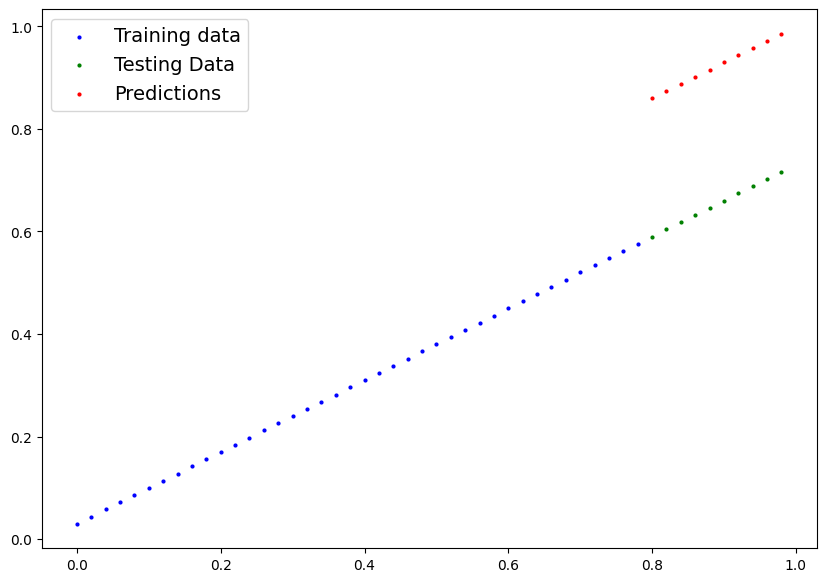

In [196]:
# check out our model predictions visually
plot_predictions(predictions=y_preds) 

In [197]:
# Save our PyTorch model
from pathlib import Path

# 1. Create the models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.path"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

# Check if the file exists
if MODEL_SAVE_PATH.exists():
    print(f"File successfully saved at: {MODEL_SAVE_PATH}")
else:
    print(f"File not found at: {MODEL_SAVE_PATH}")

Saving model to: models\01_pytorch_workflow_model_1.path
File successfully saved at: models\01_pytorch_workflow_model_1.path


In [198]:
import os
print(os.getcwd())

c:\Users\saioa\Documents\Work  folder


In [199]:
# loading 

# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()

# load the save state_dict of the model_0 (this will update the new instance with update)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# puting the loaded model
loaded_model_1.to(device)

C:\Users\saioa\AppData\Local\Temp\ipykernel_668\2878768855.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [200]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [201]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [202]:
# Evaluate loaded model 
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Extra-curriculum
Listen to The Unofficial PyTorch Optimization Loop Song (to help remember the steps in a PyTorch training/testing loop).
Read What is torch.nn, really? by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
Spend 10-minutes scrolling through and checking out the PyTorch documentation cheatsheet for all of the different PyTorch modules you might come across.
Spend 10-minutes reading the loading and saving documentation on the PyTorch website to become more familiar with the different saving and loading options in PyTorch.
Spend 1-2 hours reading/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
Wikipedia page for gradient descent
Gradient Descent Algorithm — a deep dive by Robert Kwiatkowski
Gradient descent, how neural networks learn video by 3Blue1Brown
What is backpropagation really doing? video by 3Blue1Brown
Backpropagation Wikipedia Page

In [203]:
### Exercises &